# Proposito del Proyecto Juegos de Consolas

[Conocer que plataforma es la mas vendida asi como que genero es mas vendido y cual de esos generos es el que mas se vende y en que contineste se vende mas cada genero
]

## Inicialización

In [261]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import sidetable as stb

## 1.2 Cargar datos

In [7]:
datos_crudos = pd.read_csv("games.csv")
#/datasets/

## 1.3 Preparar los datos

In [9]:
def info_gral(datos):
    print("Primeras Filas")
    print(datos.head())
    print()
    print("Datos Generales")
    print(datos.info())
    print()
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print()
    print("Revision de Duplicados")
    print(datos.duplicated().sum())

In [10]:
info_gral(datos_crudos)

Primeras Filas
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 

In [11]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


[SE REVISO TODO EL ARCHIVO QUE SE NECESITARIA HACER DE LIMPIEZA SABER SI HABIA DATOS AUSENTES, DUPLICADOS Y EL FORMATO DE CADA COLUMNA SE OCUPO LA LIBRERIA DE SIDETABLE PARA REVISAR EL PORSENTAJE DE DATOS AUSENTE EN EL CUAL NOS DIMOS CUENTA QUE CRITIC_SCORE SON MAS DE 50% DE LOS DATOS LO CUAL LO MAS RECOMENDABLE ERA NO SACAR LA MEDIA NI LA MEDIANA YA QUE AL FINAL NUESTRO ANALISIS ESTARIA MAL ANALIZADO DE ESA FORMA DECIDIMOS HACER LA SIGUIENTE LIMPIEZA]

## 1.4 Limpieza de Datos

In [13]:
#los titulos de las columna las convertimos en minusculas
datos_crudos.columns = datos_crudos.columns.str.lower()

In [14]:
#revisamos cuantos datos ausentes hay
#datos_crudos[datos_crudos['name'].isna()] 

In [15]:
# remplazamos los NaN con Desconocido porque no sabemos el nombre del juego y son pocos datos no afecta  
datos_crudos['name'] = datos_crudos['name'].fillna("desconocido") 
# remplazamos los NaN con Desconocido porque no sabemos el nombre del juego y son pocos datos no afecta  
datos_crudos['genre'] = datos_crudos['genre'].fillna("Desconocido") 

In [16]:
# remplazamos los NaN con 0 un numero grande de año y convetimos la columna en tipo entero
datos_crudos['year_of_release'] = datos_crudos['year_of_release'].fillna("0").astype(int)

In [17]:
#datos_crudos[datos_crudos['critic_score'].isna()]

In [18]:
#remplazamos 'critic_score' con -1 puntuacion critica
datos_crudos['critic_score'] = datos_crudos['critic_score'].fillna("-1")
#remplazamos datos ausentes de 'rating' con TBD: significa "to be determined"
datos_crudos['rating'] = datos_crudos['rating'].fillna("TBD") 

In [22]:
datos_crudos['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [52]:
datos_crudos.loc[datos_crudos['user_score'] == 'tbd', 'user_score']= np.nan
datos_crudos['user_score'] = datos_crudos['user_score'].astype(float)
datos_crudos['user_score'] = datos_crudos['user_score'].fillna(-1)

In [54]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%
critic_score,0,"16,715",0.00%
user_score,0,"16,715",0.00%


In [60]:
#Calcula las ventas totales
#datos_crudos['ventas_totales'] = datos_crudos['na_sales'] + datos_crudos['eu_sales'] + datos_crudos['jp_sales'] + datos_crudos['other_sales']

#otra forma que se puede es 
datos_crudos['ventas_totales'] = datos_crudos[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)
datos_crudos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,TBD,31.38


LA LIMPIEZA QUE HICIMOS FUE PONER DESCONOCIDO EN LOS DATOS AUSENTES DE NOMBRE Y GENERO YA QUE SU PORCENTAJE ERA PEQUEÑO PARA Year_of_Release LO RELLENAMOS CON [0] LO CUAL NO NOS AFECTARIA AL MOMENTO DE HACE UN ANALISIS, Rating LO RELLENAMOS CON TBD: significa "to be determined" Y CRITI_SCORE Y USER_SCORE YA QUE LOS PORCENTAJES DE DATOS AUSENTES SON DEMACIADOS FERERIMOS NO TOMARLOS EN CUENTA PARA HACER ANALISIS ENTONCES COLOCAMOS [-1] 

## 1.5 Estudia el comportamiento de juegos

### 1.5.1 Año de lanzamiento total de venta por año.

In [77]:
games_per_year =datos_crudos.groupby('year_of_release').count()['name'].sort_values(ascending=False).reset_index()

In [82]:
games_per_year = games_per_year.query('year_of_release !=0')
games_per_year.columns=['year_of_release','ventas_totales']

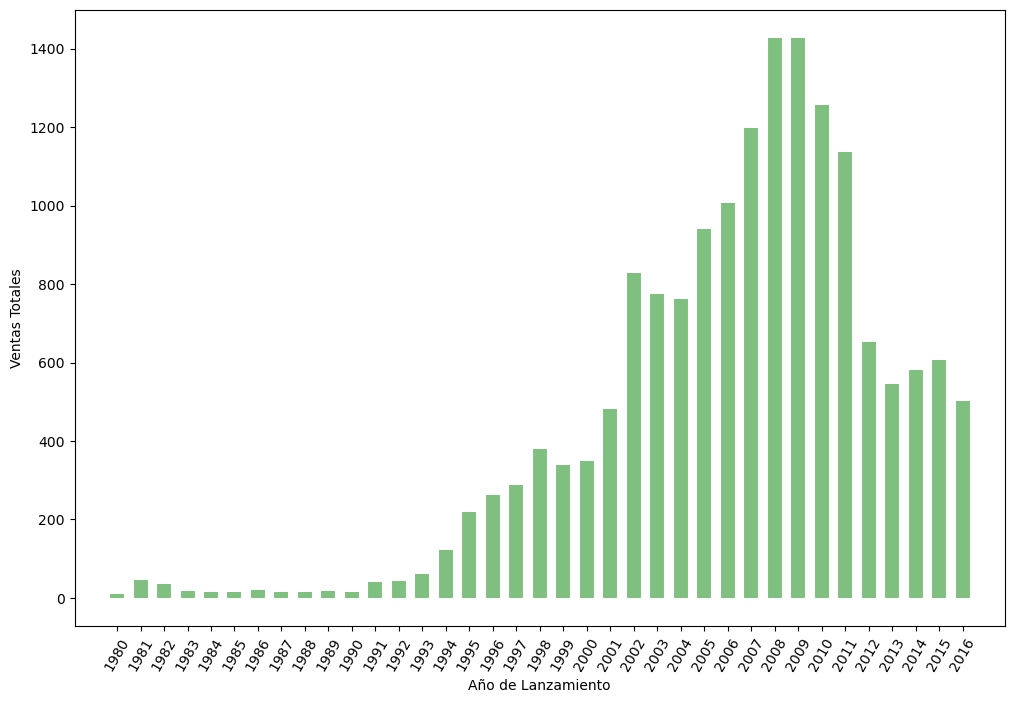

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar las líneas verticales
ax.vlines(x=games_per_year.year_of_release, ymin=0, ymax=games_per_year.ventas_totales, alpha=0.5, linewidth=10, color='green')

# Etiquetas de los ejes
ax.set_xlabel('Año de Lanzamiento')  # Etiqueta del eje X
ax.set_ylabel('Ventas Totales')      # Etiqueta del eje Y

# Personalización del eje X
ax.set_xticks(games_per_year.year_of_release)
ax.set_xticklabels(games_per_year.year_of_release, rotation=60)

# Mostrar el gráfico
plt.show()

AL HACER ESTE ANALISIS VEMOS COMO VARIAN LAS VENTAS SEGUN PASAN LOS AÑOS LLEGANDO AL MAXIMO EN EL 2008 Y 2009 Y POSTERIORMENTE TENIENDO SUS BAJAS DE VENTAS HAY QUE RECORDAR Y TENER EN CUENTA QUE NO SE TOMARON EN CUENTA LOS DATOS AUSENTES DE LOS AÑOS QUE SE COLOCO EN [0]

### 1.5.2 Plataformas con mayores ventas

In [120]:
# Plataforma con mayores ventas
ventas_plataforma = datos_crudos.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()
ventas_plataforma


,platform,ventas_totales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


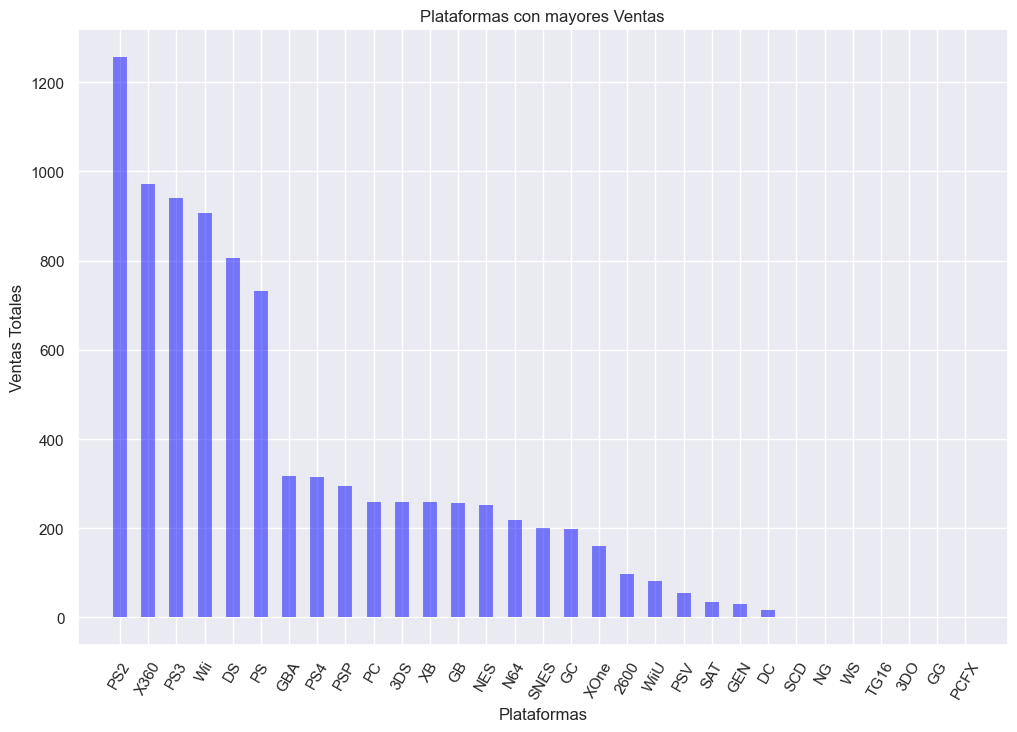

In [289]:
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar las líneas verticales
ax.vlines(x=ventas_plataforma.platform, ymin=0, ymax=ventas_plataforma.ventas_totales, alpha=0.5, linewidth=10, color='blue')

# Etiquetas de los ejes
ax.set_xlabel('Plataformas')         # Etiqueta del eje X
ax.set_ylabel('Ventas Totales')      # Etiqueta del eje Y

# Personalización del eje X
ax.set_xticks(ventas_plataforma.platform)
ax.set_xticklabels(ventas_plataforma.platform, rotation=60)
plt.title('Plataformas con mayores Ventas')

# Mostrar el gráfico
plt.show()

EN ESTE PUNTO DEL ANALISIS VEMOS TODAS LAS PLATAFORMAS CUALES SON DE MAYOR VENTAS QUE EN EL #1 FUE PS2 Y POSTERIORMENTE LE SIGUEN X360, PS3, WII, DS,PS  SIENTO TAMBIEN PARTE DE BUENAS VENTAS.

### 1.5.3 Êxito de las plataformas

In [152]:
ventas_plataforma['z_score']=(ventas_plataforma['ventas_totales']-ventas_plataforma['ventas_totales'].mean())/ventas_plataforma['ventas_totales'].std()

In [154]:
ventas_plataforma['color']=['red' if puntaje < 0 else 'green' for puntaje in ventas_plataforma ['z_score']]

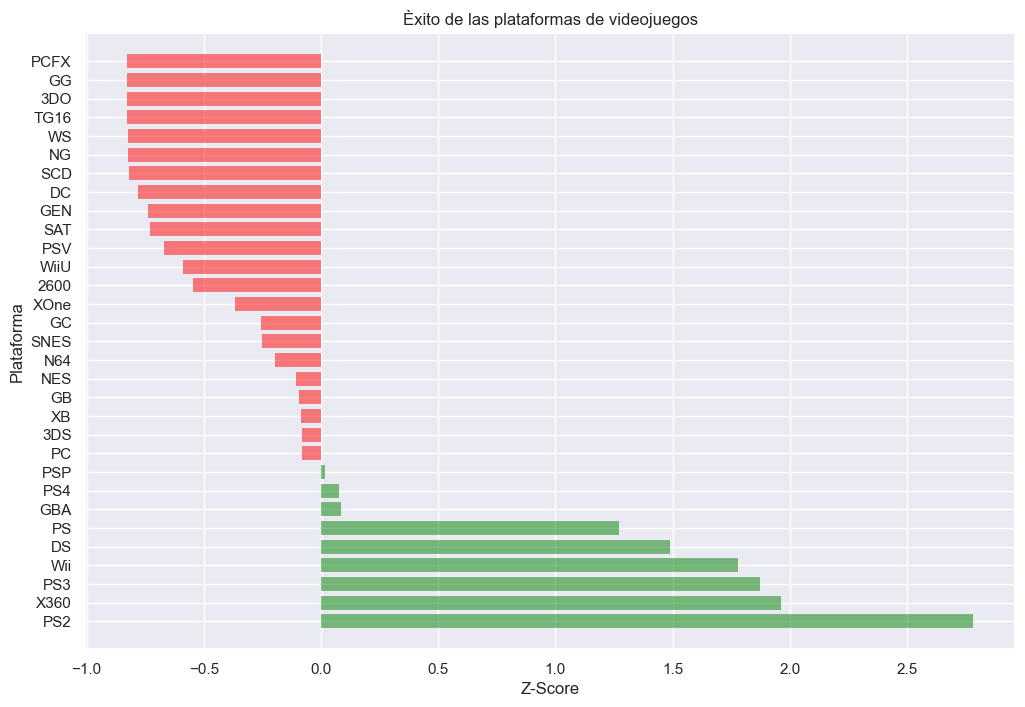

In [232]:
plt.figure(figsize = (12, 8))
plt.hlines(y=ventas_plataforma.platform, xmax=ventas_plataforma.z_score, xmin=0, linewidth =10, alpha=0.5, color=ventas_plataforma.color)
# Agrega etiquetas a los ejes
plt.xlabel('Z-Score')   # Etiqueta para el eje X
plt.ylabel('Plataforma')  # Etiqueta para el eje Y
plt.title('Èxito de las plataformas de videojuegos')

plt.show()

ESTE GRÁFICO NOS PERMITE OBSERVAR CÓMO HAN VARIADO LA POPULARIDAD Y EL ÉXITO DE LAS PLATAFORMAS DE VIDEOJUEGOS A LO LARGO DEL TIEMPO. MUESTRA CLARAMENTE CUÁLES PLATAFORMAS DOMINARON EN CIERTOS PERÍODOS Y CUÁLES NO LOGRARON UN IMPACTO SIGNIFICATIVO. ES UNA VISUALIZACIÓN ÚTIL PARA COMPRENDER LA EVOLUCIÓN DE LA INDUSTRIA Y EL CICLO DE VIDA DE LAS PLATAFORMAS DE VIDEOJUEGOS.

### 1.5.4 Los juegos que fueron lanzados en diferentes años.

 #### 1.5.4.1 Tiempo de vida de las plataformas desde 1980

In [292]:

df_tiempo_de_vida = datos_crudos.pivot_table(
    index= 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum'
).fillna(0)

In [294]:
df_tiempo_de_vida = df_tiempo_de_vida.iloc[1: , : ]

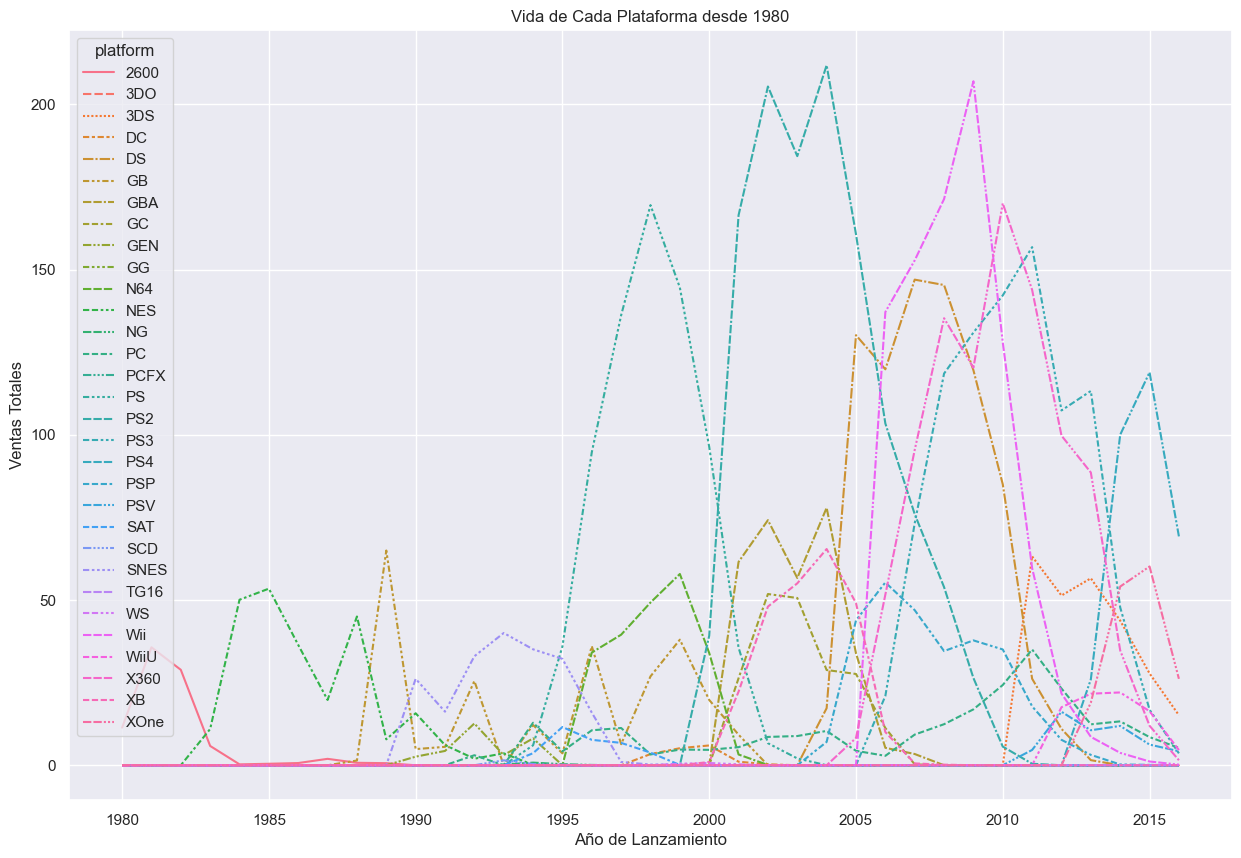

In [356]:
sns.set(rc={'figure.figsize': (15,10)})
sns.lineplot(data=df_tiempo_de_vida)
plt.xlabel('Año de Lanzamiento')   # Etiqueta para el eje X
plt.ylabel('Ventas Totales')  # Etiqueta para el eje Y
plt.title('Vida de Cada Plataforma desde 1980')
plt.show()

AQUI OBSERVAMOS LA VIDA DE CADA PLATAFORMA Y COMO SE VAN MANTENIENDO NOS MUESTRA DESDE 1980 QUE ESAS PLATAFORMA QUE INICIARON APROXIMANDAMENTE DESAPARECIERON EN 10 AÑOS Y CADA 10 AÑOS APARECE UNA PLATAFORMA DE JUEGO Y VEMOS CUALES SON LAS QUE SE HAN MANTENIDO EN EL MERCADO CON MAYORES VENTAS 

 #### 1.5.4.1 Tiempo de vida de las plataformas desde 2005

In [212]:
clean_data = datos_crudos[datos_crudos.year_of_release >= 2005]

In [214]:
df_tiempo_de_vida = clean_data.pivot_table(
    index= 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum'
).fillna(0)

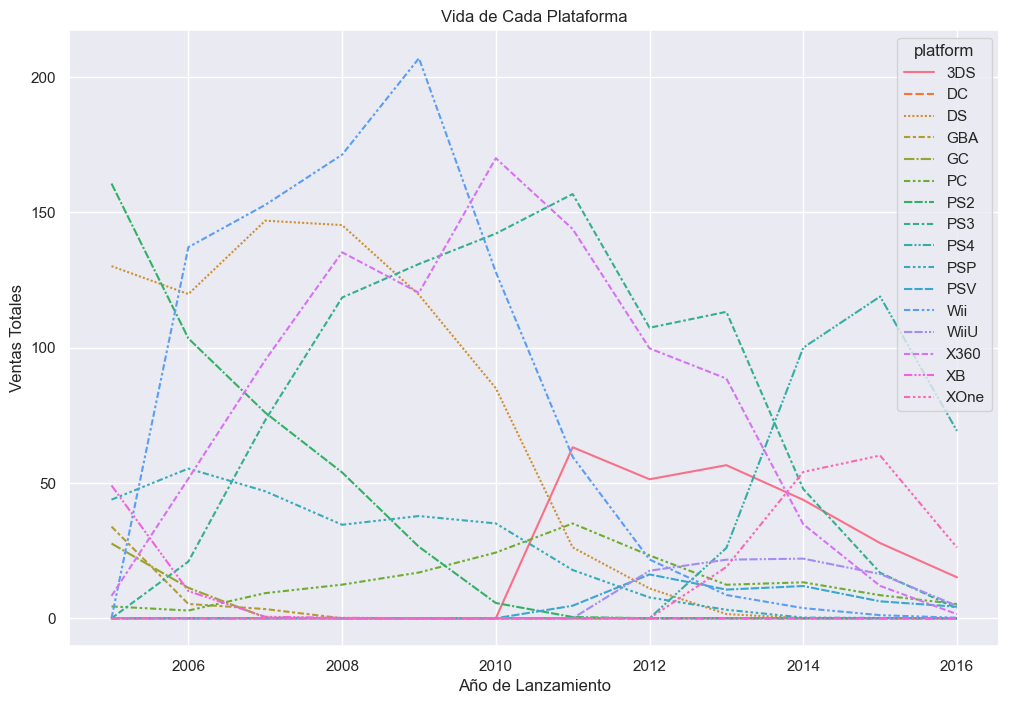

In [226]:
sns.set(rc={'figure.figsize': (12,8)})
sns.lineplot(data=df_tiempo_de_vida)
plt.xlabel('Año de Lanzamiento')   # Etiqueta para el eje X
plt.ylabel('Ventas Totales')  # Etiqueta para el eje Y
plt.title('Vida de Cada Plataforma')
plt.show()

ESTA IMAGEN ES PARTE DE LA ANTERIOR PERO EN ESTA VEMOS EL ANALISIS DEDE 2005 YA QUE EN ESAS FECHAS MAS O MENOS HAY MAS PLATAFORMAS EN EL MERCADO Y VEMOS DETENIDAMENTE CUALES SE HAN MANTENIDO EN LOS ULTIMOS 11 AÑOS 

## 1.6 prueba de hipotesis 

### 1.6.1 HIPOTESISI #1 Calificacion promedio de los usuarios para la plataforma PC y XOne son las mismas 

In [216]:
comparacion =clean_data.query('user_score > 0 & (platform == "XOne" or platform == "PC" )')

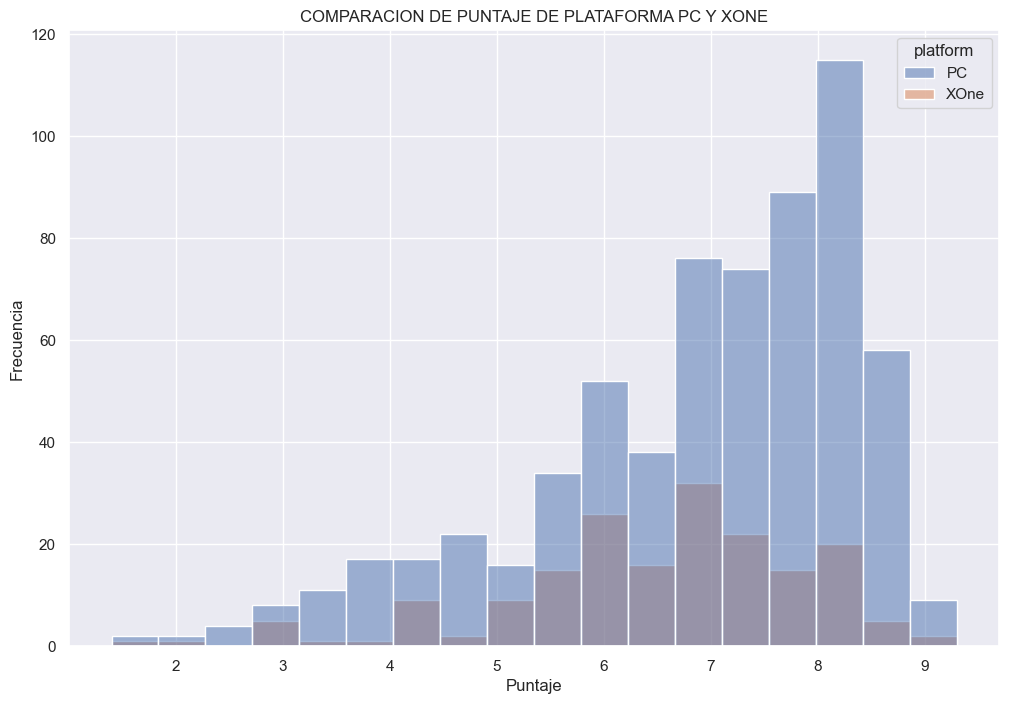

In [224]:
sns.histplot(comparacion, x='user_score', hue = 'platform')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('COMPARACION DE PUNTAJE DE PLATAFORMA PC Y XONE')
plt.show()

EN ESTA GRAFICA VEMOS QUE PC TIENE MAS CANTIDAD DE PERSONAS QUE HAY VOTADO POR LOS PUNTAJES DE 8.3 APROXIMADAMENTE Y LOS DE XONE SU PUNTAJE MAYOR ES 7 

In [234]:
comparacion.groupby('platform')['user_score'].mean()

platform
PC      6.884938
XOne    6.521429
Name: user_score, dtype: float64

H0: la diferencia entre el promedio de score de usuarios al XOne y la PC NO son estadisticamente efectivas, es decir son iguales

H1: la diferencia entre el promedio de score de usuarios al XOne y la PC son estadisticamente efectivas, es decir son diferentes

In [241]:
xone=comparacion.query('platform == "XOne"')
pc = comparacion.query('platform == "PC"')

In [249]:
nivel_de_confianza = 0.95
alpha = 1-nivel_de_confianza

In [340]:
p_value_levene = stats.levene(xone['user_score'], pc['user_score']).pvalue

if p_value_levene < alpha:
    print('Podemos rechazar la hipotesis H0: la varianza de X1 no es igual a la varianza de PC')
else:
    print('No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de XOne y PC son iguales ')
    

No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de XOne y PC son iguales 


In [273]:
p_value = stats.ttest_ind(
   xone['user_score'], pc['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value < alpha:
    print("Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC")
else:
    print("No se puede rechazar H0: No tenemos evidencia suficiente para decir que la diferencia entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC sea estadísticamente insignificante..")

Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC


AQUI HICIMOS UNA PRUENA DE HIPOTESIS CUAL ES EL PROMEDIO DE USUARIOS QUE USAN XONE Y PC Y SI SON IGUALES Y NOS SALIO QUE HIPOTESIS H0 SE RECHAZA LO CUAL SUGIERE QUE LOS PUNTAJES PROMEDIOS DE LOS USUARIOS XONE Y PC SON EFECTIVAS, DIFERENTES DE UNA MANERA ESTADISTICA SIGNFIFICATIVA. 

### 1.6.2 HIPOTESIS 2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes 

In [309]:
comparacion_genero =clean_data.query('user_score > 0 & (genre == "Action" or genre == "Sports" )')

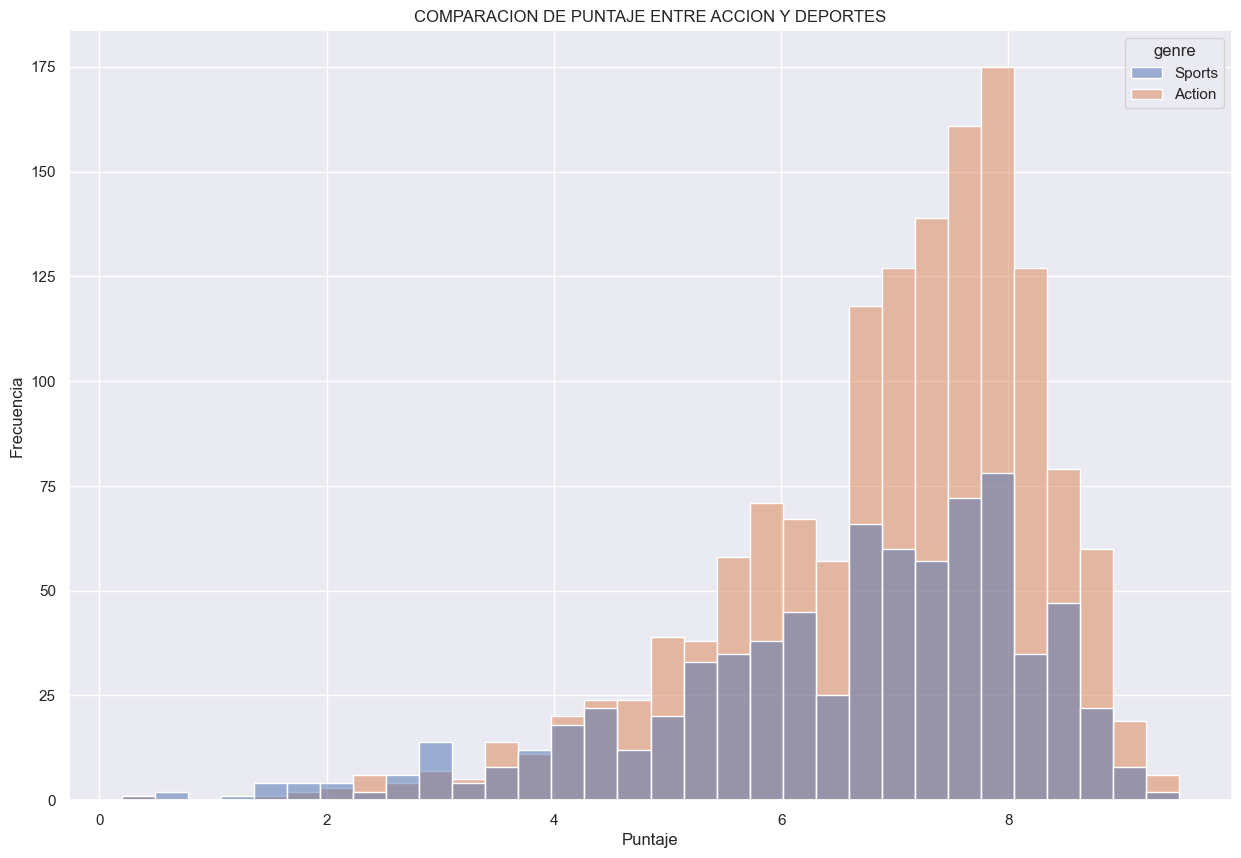

In [318]:
sns.histplot(comparacion_genero, x='user_score', hue = 'genre')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('COMPARACION DE PUNTAJE ENTRE ACCION Y DEPORTES')
plt.show()

EN ESTA GRAFICA VEMOS QUE LOS JUEGOS DE ACCION SU PUNTAJE MAS VOTADO ES 8 SIGUIENDO 7 Y 7.5 Y EL PUNTAJE MAS ALTO PARA DEPORTES ES 8 SEGUIDO DE 7.8 MAS O MENOS AUNQUE SU FRECUENCIA ES MENOR AL DE ACCION.

In [320]:
comparacion_genero.groupby('genre')['user_score'].mean()

genre
Action    6.947027
Sports    6.539498
Name: user_score, dtype: float64

In [326]:
accion = comparacion.query('genre == "Action"')
deportes = comparacion.query('genre == "Sports"')

In [328]:
nivel_de_confianza_2 = 0.95
alpha_2 = 1-nivel_de_confianza_2

In [336]:
p_value_levene = stats.levene(accion['user_score'], deportes['user_score']).pvalue

if p_value_levene < alpha:
    print('Podemos rechazar la hipotesis H0: la varianza de X1 no es igual a la varianza de genero Accion y Deportes')
else:
    print('No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de genero Accion y Deportes son iguales ')
    

No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de genero Accion y Deportes son iguales 


In [334]:
p_value = stats.ttest_ind(
   accion['user_score'], deportes['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value < alpha:
    print("Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de los genero Accion y Deportes")
else:
    print("No se puede rechazar H0: No tenemos evidencia suficiente para decir que la diferencia entre las calificaciones promedio de los usuarios de los genero Accion y Deportes sea estadísticamente insignificante..")

Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de los genero Accion y Deportes


In [ ]:
Y NUESTRA HIPOTESIS AQUI ES QUE EL PROMEDIO DE ACCION Y DEPORTE ESTADISTICAMENTE SON IGUALES Y SE RECHAZA LA HIPOTESIS NULA 

## 1.7 Conclusion General

EN CONCLUCION A PESAR DE QUE HAY MUCHOS DATOS AUSENTES DETERMINAMOS QUE 

1.- QUE LAS VENTAS MAS ALTAS SON DEL 2007 AL 2011 SIENDO LOS AÑOS CON MAS VENTAS DESPUES DEL 2011 BAJARON MUCHO LAS VENTAS
2.- LAS PLATAFORMAS MAS VENDIDAS SON #1 PS2 Y POSTERIORMENTE LE SIGUEN X360, PS3, WII, DS,PS
3.- LAS PALTAFORMAS CON MAYOR PUPULARIDAD SIGUEN SIENDO PS2 Y X360
4.- NOS DIMOS CUENTA QUE LA VIDA DE UNA PLATAFORMA ES MAS O MENOS 10 AÑOS Y DESPUES DE ESO UNA DE CAEN Y OTRAS DESAPARECEN Y UNAS SE SIGUEN MANTENIENDO DE PIE Y CON BUENAS GANANCIAS
5.- SE HIZO UNA COMPARACION DE PROMEDIO DE 2 PLATAFORMAS QUE ES PC Y XONE LA CUAL SALIO EXISTEN DIFERENCIAS DE CALIFICACIONES ESTADISTICAMENTE ENTRE XONE Y PC 
6.- SE HIZO UNA COMPARACION DE PROMEDIO DE 2 GENEROS QUE FUE ACCION Y DEPORTES Y SALIO SON DIFERENTES DE CALIFICACIONES ESTADISTICAS ENTRE ACCION Y DEPORTES 
